In [424]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [425]:
df_train = pd.read_csv('titanic_data/train.csv')
df_train_copy = pd.read_csv('titanic_data/test.csv')
df_test = pd.read_csv('titanic_data/test.csv')

In [426]:
print(df_train.info())
df_train.head(n=4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DB04630>]],
      dtype=object)

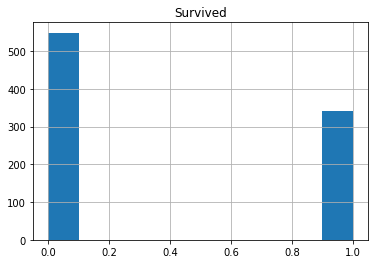

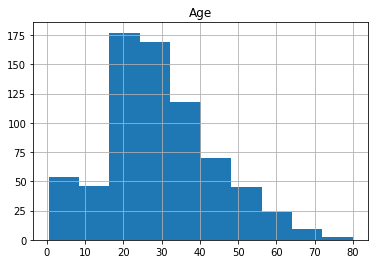

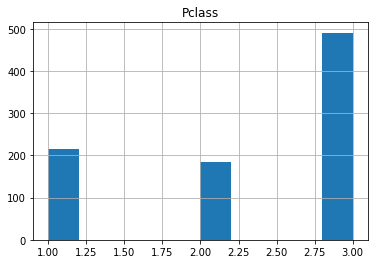

In [427]:
df_train.hist(column='Survived')
df_train.hist(column='Age')
df_train.hist(column='Pclass')

In [428]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Coutts, Master. William Loch ""William""",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [429]:
corr_matrix = df_train.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [430]:
female_survival_rate = df_train["Survived"][df_train["Sex"]=="female"].value_counts(normalize=True)[1]*100
print("Female percentange survived", female_survival_rate)

Female percentange survived 74.20382165605095


In [431]:
male_survival_rate = df_train["Survived"][df_train["Sex"]=="male"].value_counts(normalize=True)[1]*100
print("male percentange survived", male_survival_rate)

male percentange survived 18.890814558058924


In [432]:
tab = pd.crosstab(df_train['Pclass'], df_train['Sex'])
print(tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [433]:
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Text(0, 0.5, 'Percentage')

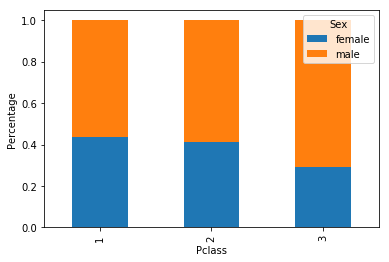

In [434]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [392]:
ages = df_train['Age']
age_median = ages.median()


In [393]:
test_ages = df_test['Age']
test_median = test_ages.median()

In [394]:
df_train['Age'].fillna(age_median, inplace=True)

In [395]:
df_test['Age'].fillna(test_median, inplace=True)

In [396]:
bins = [0, 10, 18, 35, 65, np.inf]
# 0-10, 10-18, 18-35, 35-65, 65+
names = [0, 1, 2, 3, 4] 
df_train['AgeRange'] = pd.cut(df_train['Age'], bins, labels=names)

In [397]:
df_test['AgeRange'] = pd.cut(df_test['Age'], bins, labels=names)

In [398]:
del df_train['Age']
del df_train['Embarked']

del df_test['Age']
del df_test['Embarked']

In [399]:
df_train['has_cabin'] = df_train['Cabin'].apply(lambda x: 0 if type(x)==float else 1)
df_test['has_cabin'] = df_test['Cabin'].apply(lambda x: 0 if type(x)==float else 1)

In [400]:
df_train['Fare'].fillna((df_train['Fare'].mean()), inplace=True)
df_test['Fare'].fillna((df_test['Fare'].mean()), inplace=True)

In [401]:
del df_train['Cabin']
del df_test['Cabin']

del df_train['Name']
del df_test['Name']

In [402]:
del df_train['Ticket']
del df_test['Ticket']

In [404]:
total = [df_train, df_test]
sex = {'female':0, 'male':1}

In [405]:
for ds in total:
    ds['Sex'] = ds['Sex'].map(sex)

In [406]:
features = ['Pclass', 'Sex', 'Fare', 'AgeRange', 'has_cabin']
target = 'Survived'

In [409]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [410]:
y_train = df_train['Survived']
x_train = df_train.drop(['Survived'], axis=1).values
x_test = df_test.values

In [413]:
model=DecisionTreeClassifier(max_depth=3)

In [414]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [415]:
prediction = model.predict(x_test)

In [416]:
round(model.score(df_train[df_train.columns[1:]],df_train['Survived'])*100, 2)

81.82

In [ ]:
# kaggle scores it .78947

In [418]:
submission = pd.DataFrame({'PassengerId':df_train_copy['PassengerId'], 'Survived': prediction})

In [435]:
submission.to_csv('titanic_submission.csv', index=False)